<a href="https://colab.research.google.com/github/bhavya26082004/python/blob/main/AD_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
text = ['Sarah Lives in a hut in the village.',
        'She has an apple tree in her backyard.',
        'The apples are red in colour.']

df = pd.DataFrame(text,columns=['Sentence'])
df

,Sentence
0,Sarah Lives in a hut in the village.
1,She has an apple tree in her backyard.
2,The apples are red in colour.


In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
token = []
pos = []
for sent in nlp.pipe(df['Sentence']):
  if sent.has_annotation('DEP'):
    token.append([word.text for word in sent])
    pos.append([word.pos_ for word in sent ])

In [ ]:
token

[['Sarah', 'Lives', 'in', 'a', 'hut', 'in', 'the', 'village', '.'],
 ['She', 'has', 'an', 'apple', 'tree', 'in', 'her', 'backyard', '.'],
 ['The', 'apples', 'are', 'red', 'in', 'colour', '.']]

In [ ]:
pos

[['PROPN', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT'],
 ['PRON', 'VERB', 'DET', 'NOUN', 'NOUN', 'ADP', 'PRON', 'NOUN', 'PUNCT'],
 ['DET', 'NOUN', 'AUX', 'ADJ', 'ADP', 'NOUN', 'PUNCT']]

In [ ]:
df['token']=token
df['pos']=pos

In [ ]:
df.head()

,Sentence,token,pos
0,Sarah Lives in a hut in the village.,"[Sarah, Lives, in, a, hut, in, the, village, .]","[PROPN, VERB, ADP, DET, NOUN, ADP, DET, NOUN, ..."
1,She has an apple tree in her backyard.,"[She, has, an, apple, tree, in, her, backyard, .]","[PRON, VERB, DET, NOUN, NOUN, ADP, PRON, NOUN,..."
2,The apples are red in colour.,"[The, apples, are, red, in, colour, .]","[DET, NOUN, AUX, ADJ, ADP, NOUN, PUNCT]"


In [ ]:
df['noun'] = df.apply(lambda x: x['pos'].count('NOUN'), axis=1)
df['verb'] = df.apply(lambda x: x['pos'].count('VERB'), axis=1)
df['adj'] = df.apply(lambda x: x['pos'].count('ADJ'), axis=1)
df['punct'] = df.apply(lambda x: x['pos'].count('PUNCT'), axis=1)
df

,Sentence,token,pos,noun,verb,adj,punct
0,Sarah Lives in a hut in the village.,"[Sarah, Lives, in, a, hut, in, the, village, .]","[PROPN, VERB, ADP, DET, NOUN, ADP, DET, NOUN, ...",2,1,0,1
1,She has an apple tree in her backyard.,"[She, has, an, apple, tree, in, her, backyard, .]","[PRON, VERB, DET, NOUN, NOUN, ADP, PRON, NOUN,...",3,1,0,1
2,The apples are red in colour.,"[The, apples, are, red, in, colour, .]","[DET, NOUN, AUX, ADJ, ADP, NOUN, PUNCT]",2,0,1,1


In [4]:
text = 'I love NLP and I will NLP in 2 months'

In [7]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
tokens = sent_tokenize(text)
for i in tokens:
    words = nltk.word_tokenize(i)
    words = [w for w in words if not w in stop_words]
    tags = nltk.pos_tag(words)
tags

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [27]:
df['Rating'].value_counts()

,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


In [28]:
def rating(rating):
  if rating>3 and rating<=5:
    return "Positive"
  if rating>0 and rating <=3:
    return "Negative"

In [31]:
df ['Rating'] = df['Rating'].apply(rating)

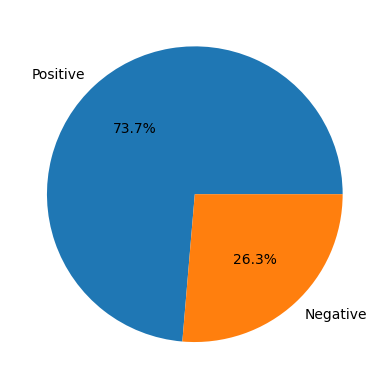

In [32]:
plt.pie(df['Rating'].value_counts(),
        labels=df['Rating'].unique().tolist(),
        autopct='%1.1f%%')
plt.show()

In [35]:
lenght = len(df['Review'][0])
print(f'Length of a sample review: {lenght}')

Length of a sample review: 593


In [36]:
df['Length'] = df['Review'].str.len()
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281


In [37]:
def word_count(review):
  review_list = review.split()
  return len(review_list)

In [39]:
df['word_count'] = df['Review'].apply(word_count)
df.head()

,Review,Rating,Length,word_count
0,nice hotel expensive parking got good deal sta...,Positive,593,87
1,ok nothing special charge diamond member hilto...,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191


In [40]:
df['mean_word_length'] = df['Review'].map(lambda rev: np.mean([len(word)
                                                    for word in rev.split()]))
df.head()

,Review,Rating,Length,word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571


In [41]:
from nltk import tokenize
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['Review'][0])])

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import nltk